# Lecture 7 - Plots
### Types, How to Make Them, and When to Use Them

## Announcements

* None?


#### Goals

* Solidify understanding of the six visualization principles introduced last class
* Know how to produce, interpret, and choose when to use several of the most commonly used types of data visualizations:
    * Tables
    * Dot and line plots
    * Box and whisker plots
    * Scatter plots
    * Bar/column plots and (usually not) pie charts
    * Histograms

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exit Ticket Data
See L06_exit.ipynb

### Lie Factor - Another Try

![](fuel_economy.jpg)

In [51]:
lie_factor = (5.3 - 0.6) / (27.5 - 18)
lie_factor

0.4947368421052632

### Visualization Principles - Discussion

![](examples/health_income.png)

* Noisy; lots of text, could use fewer individual country labels
* Good use of color
* x axis grows exponentially

![](examples/ny_weather.png)

* cluttered
* don't record range band
* icky colors, muddle some of the data

![](examples/crude_price.jpg)

* bad data-ink!
* scaling and labels - labels too large
* chartjiunk

![](examples/cotton.jpg)

* clutter
* a lot of information
* +color
* -data ink

![](examples/unemployment.png)

* +scaling
* +color
* +easy to compare along columns or rows
* -hard to compare distant states
* + repetion

![](examples/registration_1.jpg)
![](examples/registration_2.jpg)
![](examples/registration_3.jpg)

![](examples/college_enrollment.jpg)

* -3D
* -color
* -both plots show the same thing
* 

### Some Datasets to Play With

In [52]:
penguins = sns.load_dataset("penguins")
fmri = sns.load_dataset("fmri")
mpg = sns.load_dataset("mpg")

In [53]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [54]:
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

In [55]:
fmri.sort_values(by=["subject", "timepoint"])

subject  timepoint event    region    signal
67        s0          0  stim   frontal -0.021452
521       s0          0  stim  parietal -0.039327
932       s0          0   cue   frontal  0.007766
1063      s0          0   cue  parietal -0.006899
251       s0          1  stim  parietal -0.035735
...      ...        ...   ...       ...       ...
817       s9         17   cue  parietal -0.036362
5         s9         18  stim  parietal -0.103513
519       s9         18  stim   frontal -0.009959
722       s9         18   cue   frontal -0.000643
803       s9         18   cue  parietal -0.051040

[1064 rows x 5 columns]

In [56]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

## Matplotlib

Text(0, 0.5, 'Flipper Length (mm)')

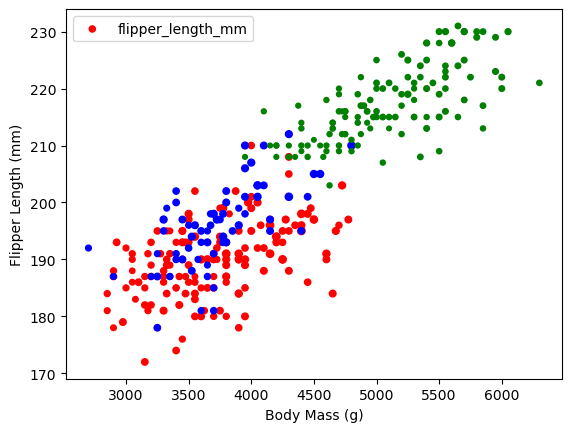

In [57]:
colors = {"Adelie": "red", "Gentoo": "green", "Chinstrap": "blue"}
size = lambda x: 10 if x > 40 else 1
plt.scatter("body_mass_g", "flipper_length_mm", data=penguins,
            c=penguins["species"].map(colors),
            s=((penguins["bill_depth_mm"]/4)**2))
plt.legend()
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")

## Seaborn

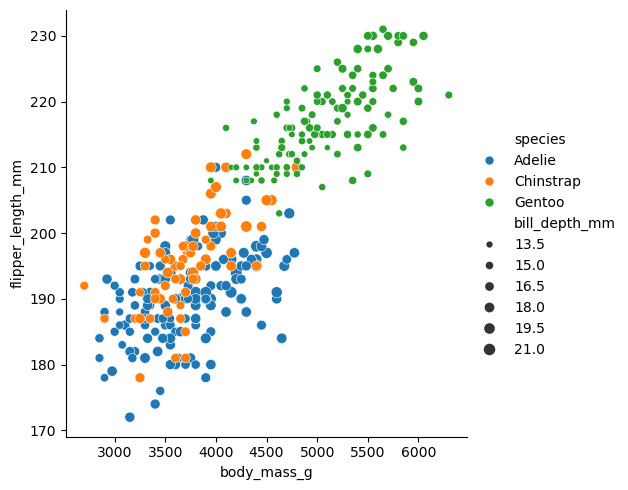

In [58]:
sns.relplot(x="body_mass_g", y="flipper_length_mm",
            hue="species", size="bill_depth_mm", data=penguins)

Key distinction: **figure-level** vs. **axes-level**:
https://seaborn.pydata.org/tutorial/function_overview.html
![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

## Common Data Visualizations

### Tables

Suppose you want to see the 5 biggest penguins.

In [59]:
penguins.sort_values("body_mass_g", ascending=False).iloc[:5,:]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
237  Gentoo  Biscoe            49.2           15.2              221.0   
253  Gentoo  Biscoe            59.6           17.0              230.0   
337  Gentoo  Biscoe            48.8           16.2              222.0   
297  Gentoo  Biscoe            51.1           16.3              220.0   
331  Gentoo  Biscoe            49.8           15.9              229.0   

     body_mass_g   sex  
237       6300.0  Male  
253       6050.0  Male  
337       6000.0  Male  
297       6000.0  Male  
331       5950.0  Male

Table Tips:
* Think about row and column ordering
* Label columns and rows well (clear but concise).
* Uniform precision, right-justified numbers.
* Sometimes: bold or emphasize max or min values in a column

In [60]:
p = penguins.rename(columns={"species": "Species", "island": "Island",
                 "bill_length_mm": "Bill Length (mm)","bill_depth_mm": "Bill Depth (mm)",
                 "flipper_length_mm": "Flipper Length (mm)", "body_mass_g": "Body Mass (g)",
                 "sex": "Sex"})
p = p[["Species", "Island", "Sex", "Body Mass (g)", "Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)"]]
p.sort_values("Body Mass (g)", ascending=False).iloc[:5,:]

Species  Island   Sex  Body Mass (g)  Bill Length (mm)  Bill Depth (mm)  \
237  Gentoo  Biscoe  Male         6300.0              49.2             15.2   
253  Gentoo  Biscoe  Male         6050.0              59.6             17.0   
337  Gentoo  Biscoe  Male         6000.0              48.8             16.2   
297  Gentoo  Biscoe  Male         6000.0              51.1             16.3   
331  Gentoo  Biscoe  Male         5950.0              49.8             15.9   

     Flipper Length (mm)  
237                221.0  
253                230.0  
337                222.0  
297                220.0  
331                229.0

### Dot plots, Line Plots

Conceptually (but not technically) different from a scatter plot, in that $x$ values are assumed to be ordered.

In [76]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [81]:
mpg_year = mpg.groupby("model_year")[["mpg"]].mean()
mpg_year

mpg
model_year           
70          17.689655
71          21.250000
72          18.714286
73          17.100000
74          22.703704
75          20.266667
76          21.573529
77          23.375000
78          24.061111
79          25.093103
80          33.696552
81          30.334483
82          31.709677

No connected dots - technically the same as a scatter plot.

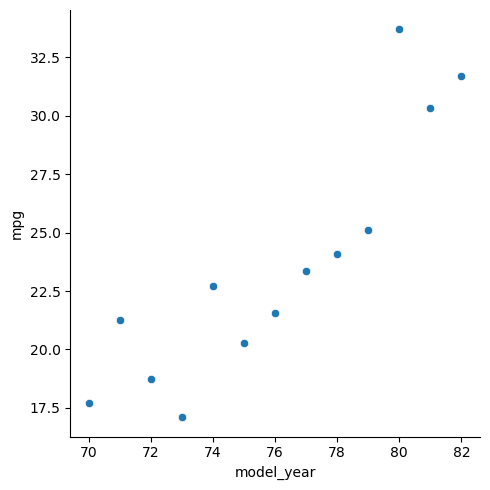

In [82]:
sns.relplot(x="model_year", y="mpg", kind="scatter", data=mpg_year)

Connect the dots: now you have a line plot:

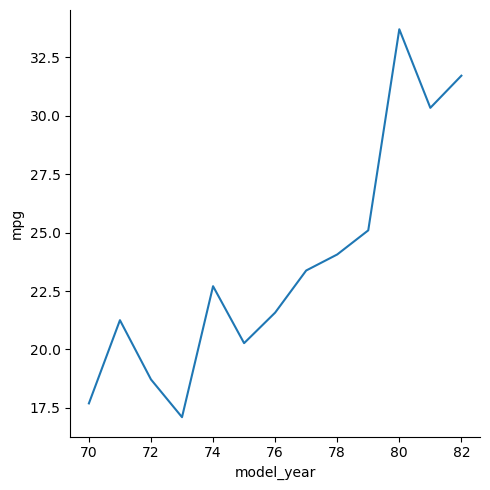

In [83]:
sns.relplot(x="model_year", y="mpg", kind="line", data=mpg_year)

Seaborn does sensible things if you have multiple datapoints per $x$ value:

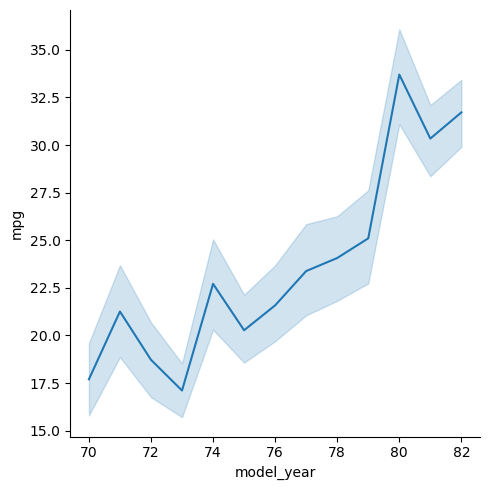

In [84]:
sns.relplot(x="model_year", y="mpg", kind="line", data=mpg)

**Quandry**: when should you connect the dots?

### Box and whisker plots

<Axes: xlabel='species', ylabel='body_mass_g'>

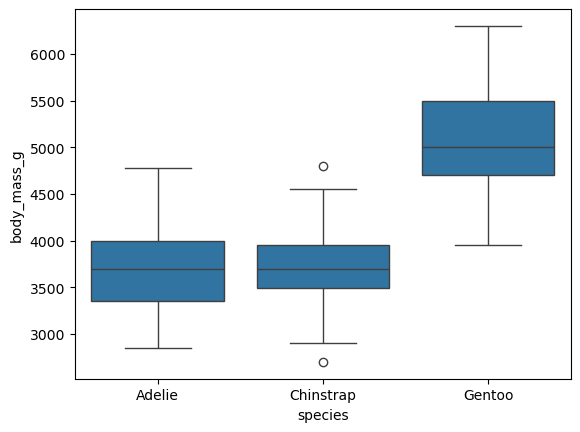

In [64]:
sns.boxplot(x="species", y="body_mass_g", data=penguins)

**Think Pair Share**: Of the ones we've discussed so far (table, dot/line, box and whisker), which kind of visualization would you use to illustrate each of the following?
1. The number of cars per model year in the MPG dataset
2. The distribution of each penguin body measurement, independent of species.
3. The centrality and variability of each penguin body measurement per species.


### Scatter plots

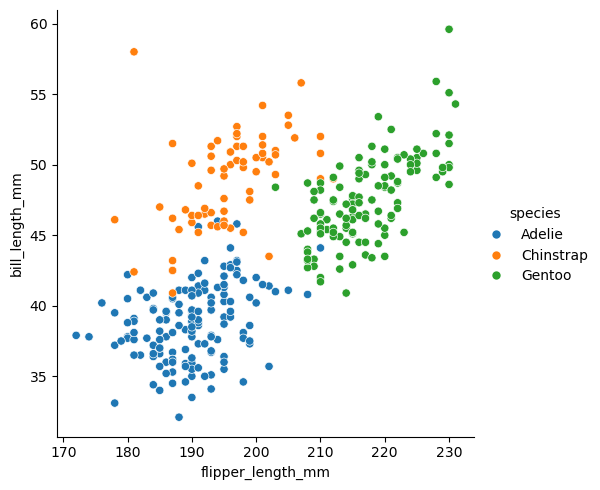

In [65]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

### Bar/column plots and (usually not) pie charts

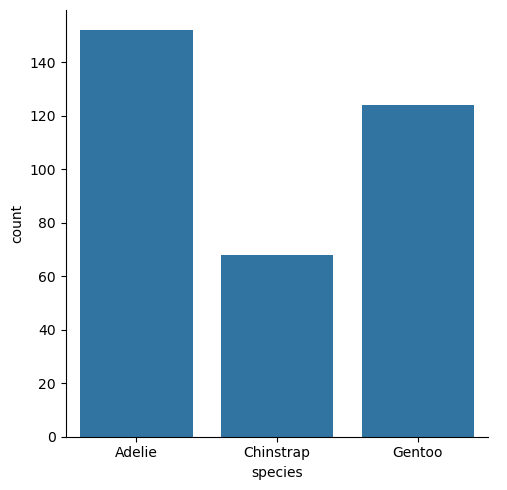

In [66]:
sns.catplot(x="species", data=penguins, kind="count")

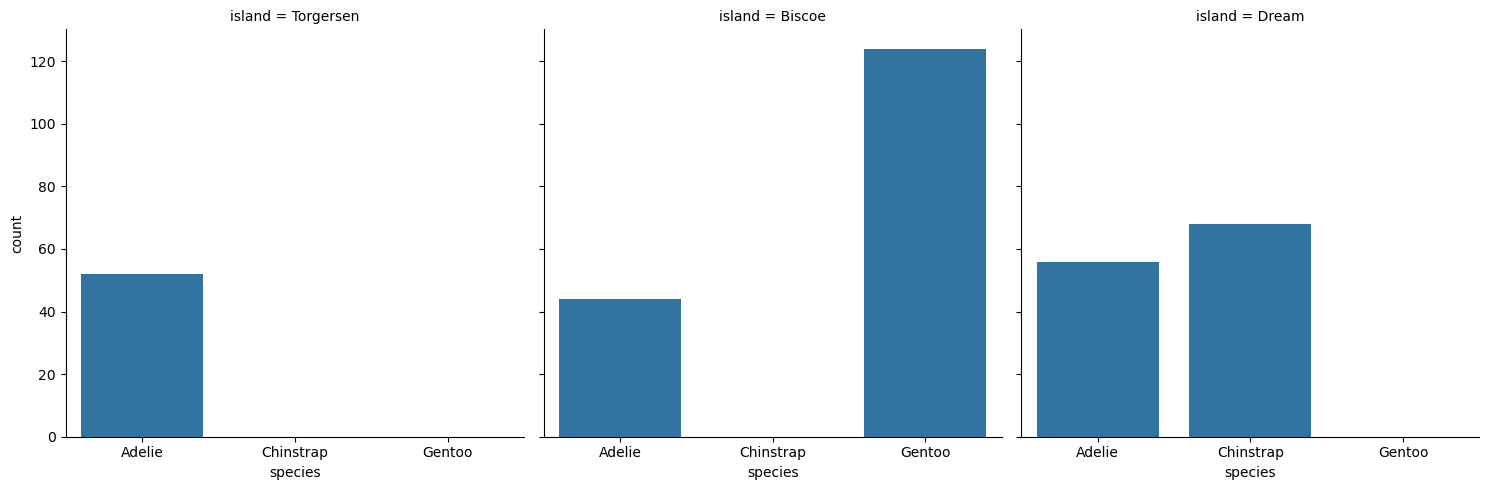

In [67]:
sns.catplot(x="species", data=penguins, kind="count", col="island")

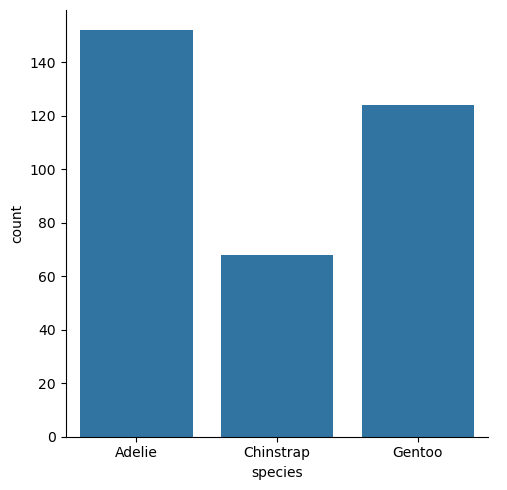

In [68]:
sns.catplot(x="species", data=penguins, kind="count")

### Histograms

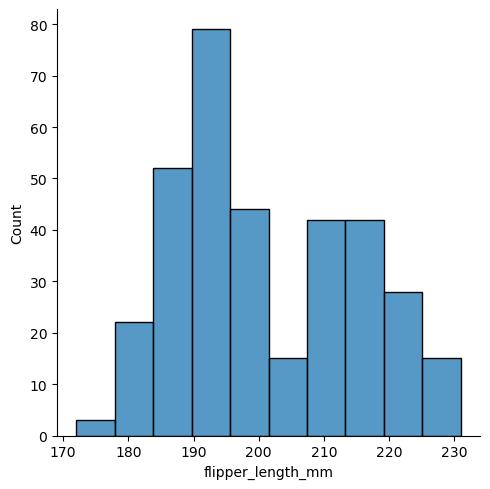

In [69]:
sns.displot(penguins, x="flipper_length_mm")

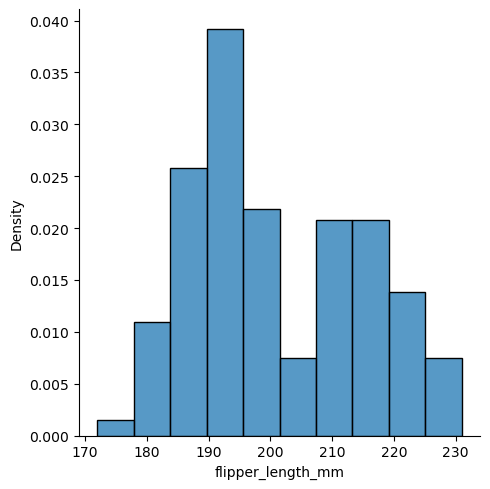

In [70]:
sns.displot(penguins, x="flipper_length_mm", stat='density')

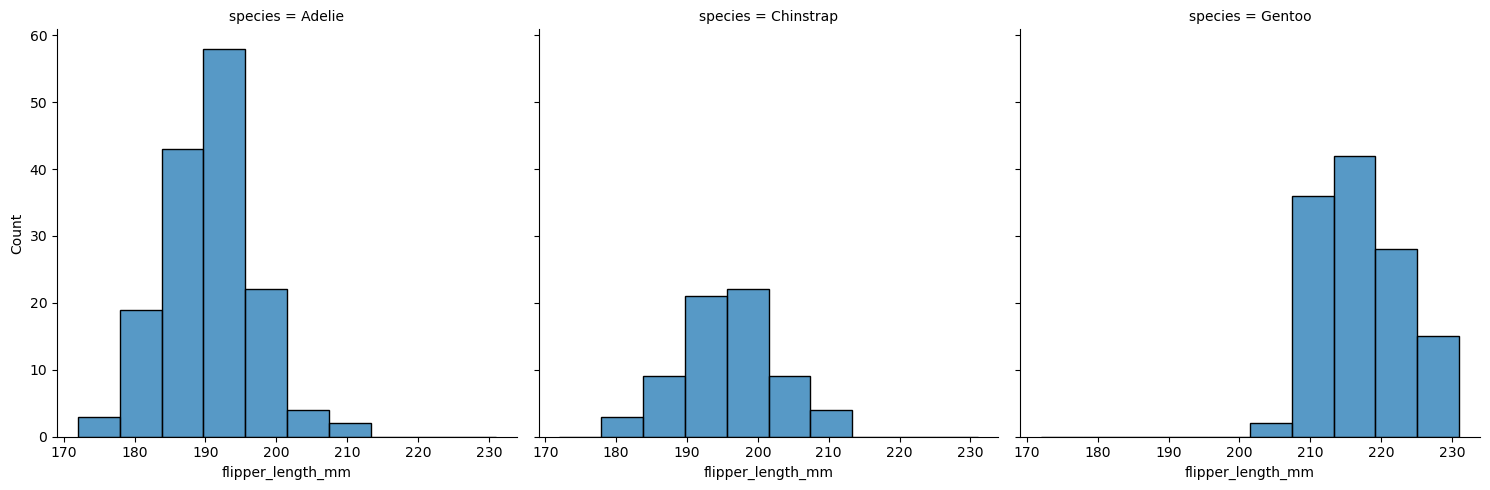

In [72]:
sns.displot(penguins, x="flipper_length_mm", col='species')

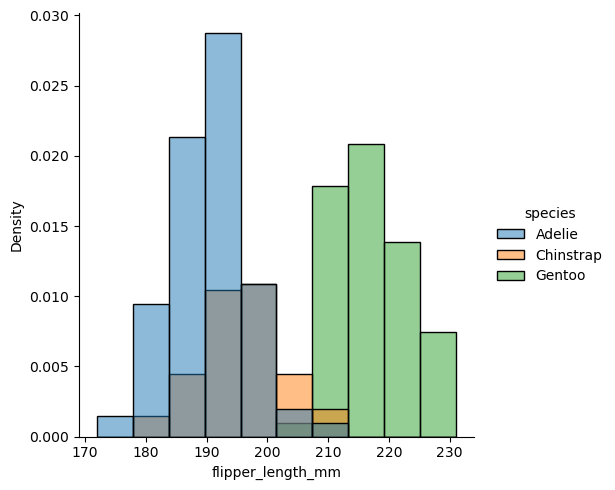

In [73]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

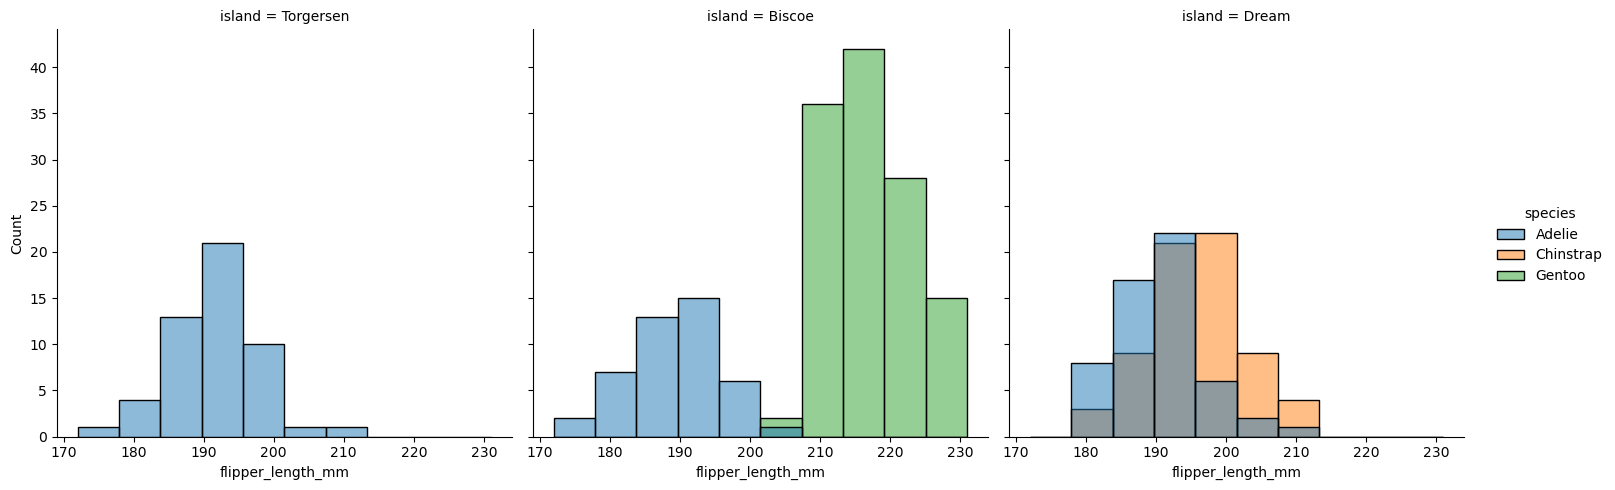

In [74]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col="island")

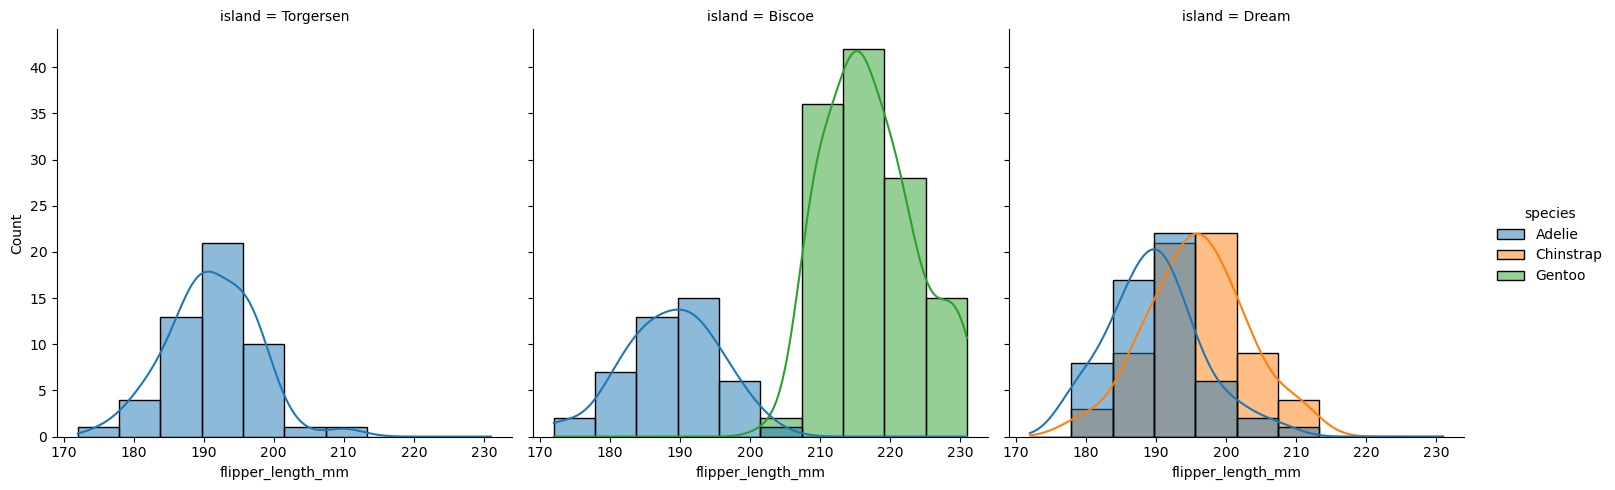

In [85]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col="island", kde='True')

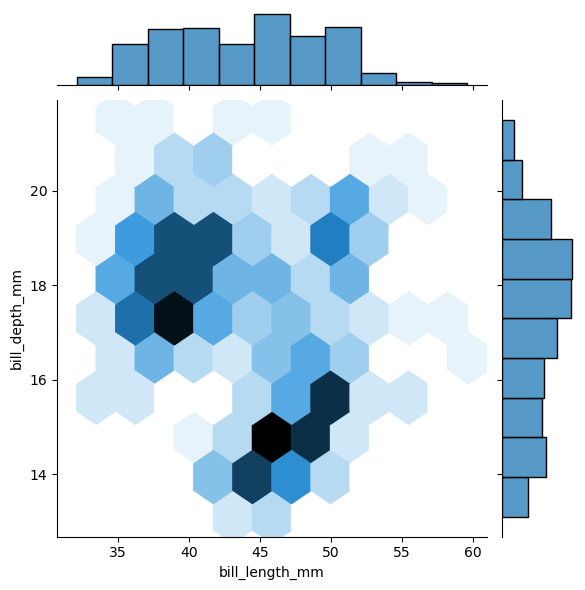

In [86]:
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, kind='hex')

In [87]:
fmri[fmri["subject"]=="s0"].sort_values(by="timepoint")

subject  timepoint event    region    signal
67        s0          0  stim   frontal -0.021452
521       s0          0  stim  parietal -0.039327
1063      s0          0   cue  parietal -0.006899
932       s0          0   cue   frontal  0.007766
675       s0          1   cue  parietal  0.000300
...      ...        ...   ...       ...       ...
783       s0         17   cue   frontal -0.010375
812       s0         18   cue  parietal -0.014664
721       s0         18   cue   frontal -0.003497
515       s0         18  stim   frontal -0.048430
14        s0         18  stim  parietal -0.075570

[76 rows x 5 columns]

**Think Pair Share:** Of the ones we've discussed so far (table, dot/line, box and whisker), which kind of visualization would you use to illustrate each of the following?
1. Average signal per subject in the fmri dataset.
2. The signal over time for each event type in patient 0, regardless of region.
3. The distribution of bill lengths for Adelie penguins.

A helpful figure from the book:
![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L07/vis_decisiontree.png)